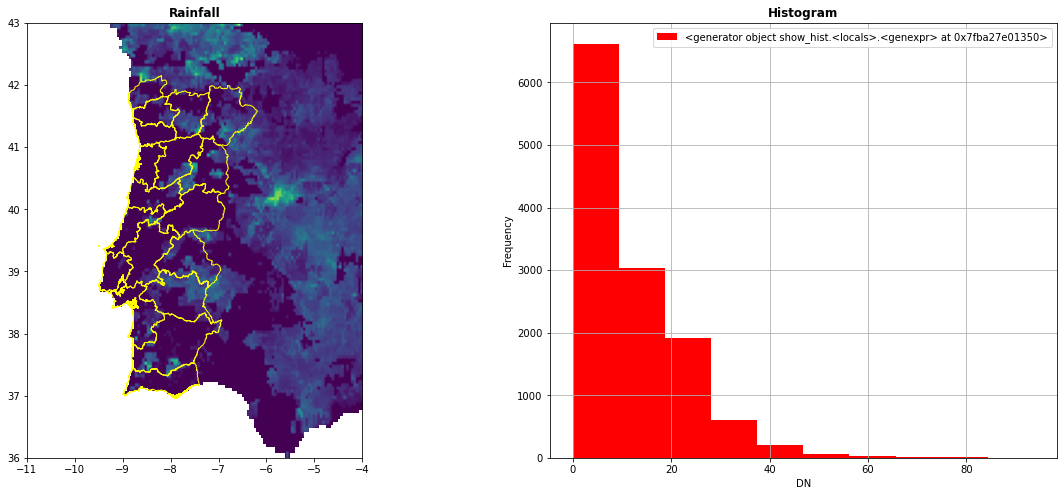

              NAME_1       mean
0              Évora  10.884027
1             Aveiro   0.000000
2               Beja   5.332767
3              Braga   4.867859
4           Bragança  11.206017
5     Castelo Branco   1.272397
6            Coimbra   3.267679
7               Faro   2.097385
8             Guarda   9.654524
9             Leiria   2.643043
10            Lisboa   0.581933
11        Portalegre   9.791677
12             Porto   0.000000
13          Santarém   2.660926
14           Setúbal   4.506786
15  Viana do Castelo   7.078903
16         Vila Real   8.453806
17             Viseu   4.682014


/opt/anaconda3/lib/python3.9/site-packages/rasterstats/io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/opt/anaconda3/lib/python3.9/site-packages/rasterstats/io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/opt/anaconda3/lib/python3.9/site-packages/rasterstats/io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/opt/anaconda3/lib/python3.9/site-packages/rasterstats/io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/opt/anaconda3/lib/python3.9/site-packages/rasterstats/io.py:313: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
/opt/anaco

In [113]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import rasterstats
import matplotlib.pyplot as plt
import pandas as pd

# Read the districts shapefile 
districts = gpd.read_file('districts.shp')

# Read the rainfall raster of 2020-04-15
rf = rasterio.open('2020-4-15.tif', mode = 'r')

# Plotting the raster and the districts shapefile together 
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
show(rf, ax = ax1, title = 'Rainfall')
districts.plot(ax = ax1, facecolor = 'None', edgecolor = 'yellow')
show_hist(rf, title = 'Histogram', ax = ax2)
plt.show()

# Assign raster values to a numpy nd array
rainfall_array = rf.read(1)

affine = rf.transform

# Calculating the zonal statistics 
avg_rf  = rasterstats.zonal_stats(districts, rainfall_array, affine = affine,
                                      stats = ['mean'], 
                                      geojson_out = True)

# Extracting the average rainfall data from the list
avg_rainfall = []
i = 0

while i < len(avg_rf):
    avg_rainfall.append(avg_rf[i]['properties'])
    i = i + 1 

# Transfering the infromation from the list to a pandas DataFrame

avg_rf_portugal = pd.DataFrame(avg_rainfall)
print(avg_rf_portugal)



In [114]:
avg_rf_portugal

,NAME_1,mean
0,Évora,10.884027
1,Aveiro,0.000000
2,Beja,5.332767
3,Braga,4.867859
4,Bragança,11.206017
5,Castelo Branco,1.272397
6,Coimbra,3.267679
7,Faro,2.097385
8,Guarda,9.654524
9,Leiria,2.643043


<AxesSubplot:title={'center':'Average Rainfall on 2020-04-15'}, xlabel='NAME_1'>

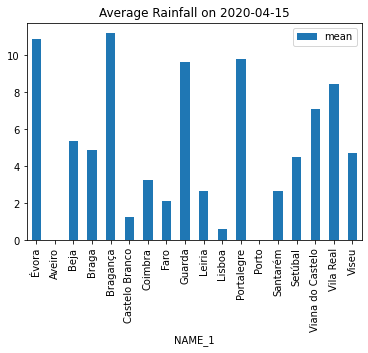

In [116]:
avg_rf_portugal.plot(x='NAME_1',y='mean',kind='bar',title='Average Rainfall on 2020-04-15')
    
   